# 💳 신용카드 사용자 연체 예측 AI 경진대회

# Table of Contents
1. EDA   
  (a) Categorical Variable   
  (b) Numerical Variable   
2. Data Preprocessing
3. Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/aiffel/DACON_credit_card_data/'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 1. EDA

In [5]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [6]:
train = pd.read_csv(data_path + 'train.csv')
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

Null Check

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


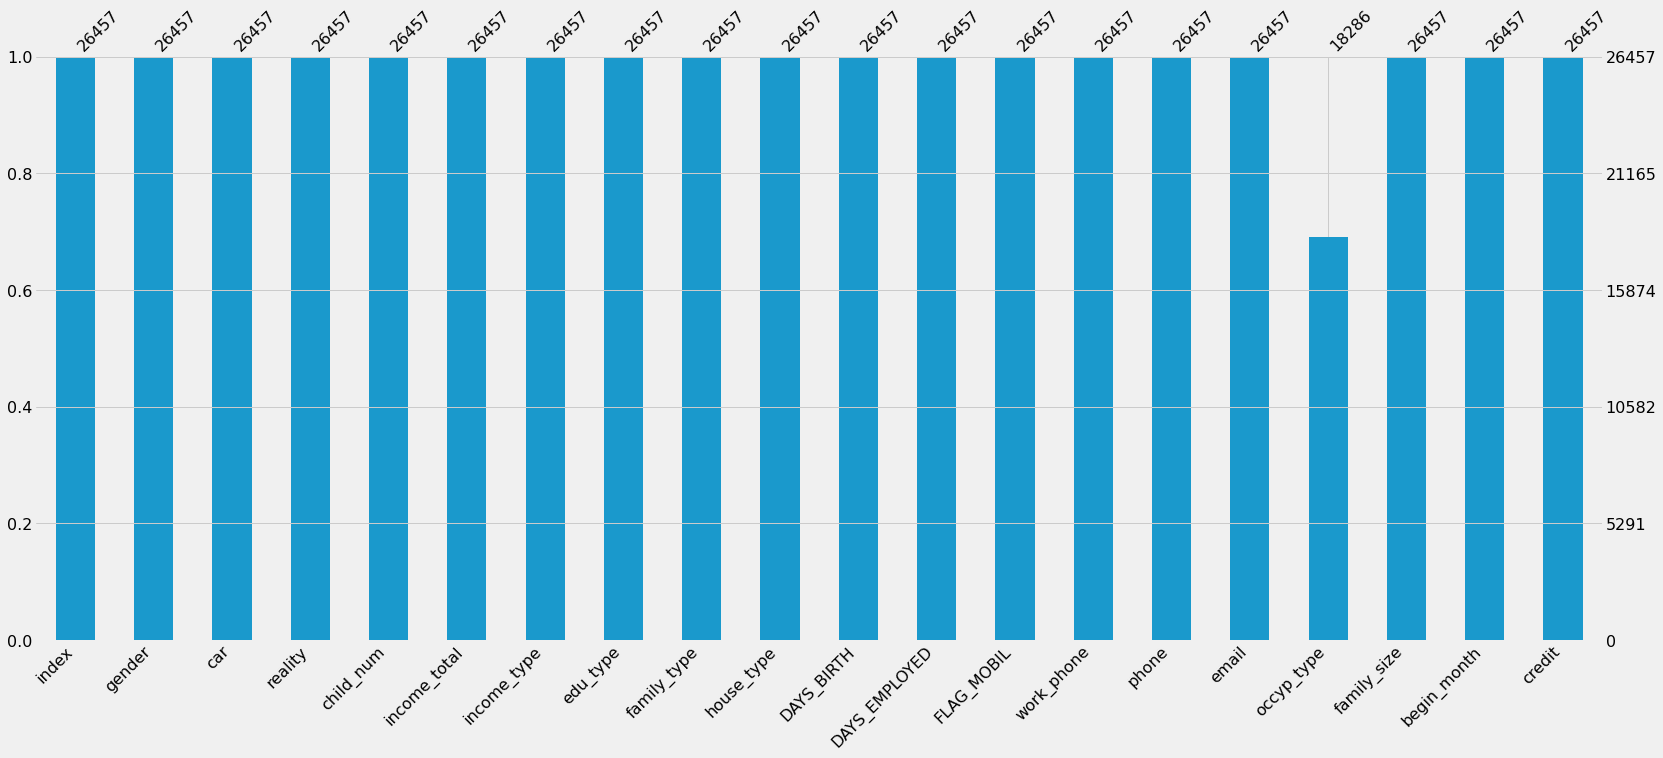

In [8]:
import missingno as msno
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [9]:
# credit 형 변환
train = train.astype({'credit': 'object'})
print(train.dtypes)

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit            object
dtype: object


## (a) Categorical Variable EDA
신용 등급 비율

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


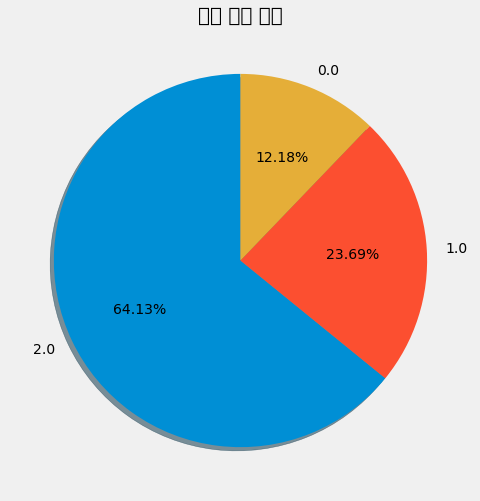

In [10]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()

신용 등급에 따른 차이를 알아보기 위해 다음과 같이 데이터를 분리하도록 하겠습니다.

In [11]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

In [12]:
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

신용 등급에 따른 성별 차이

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


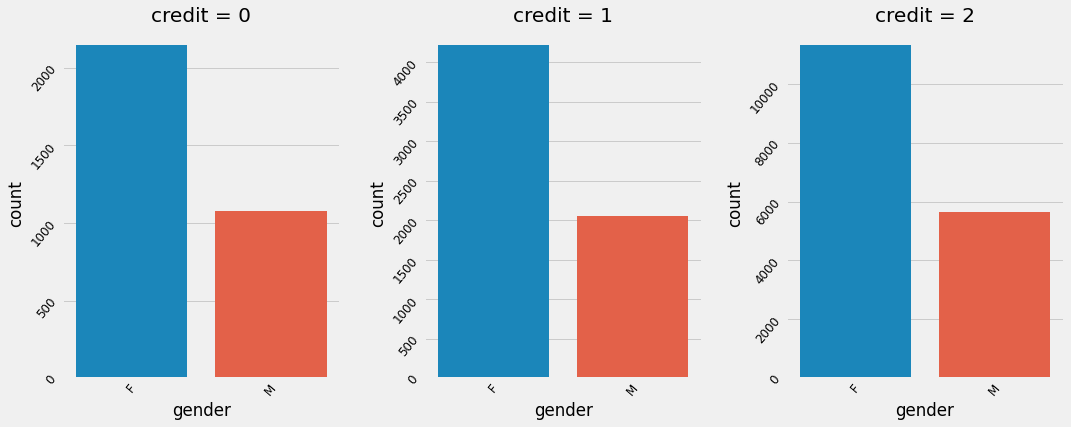

In [13]:
cat_plot("gender")

신용 등급에 따른 차량 소유 여부

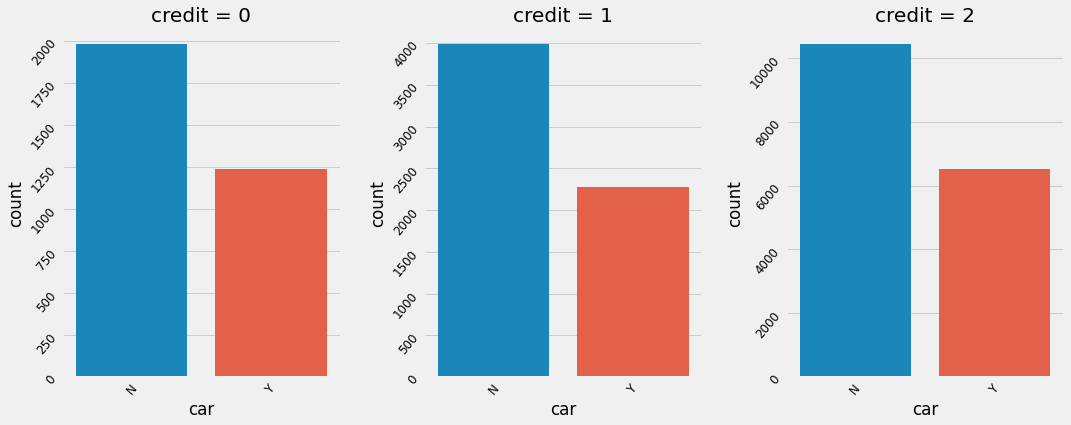

In [14]:
cat_plot('car')

신용 등급에 따른 보동산 소유 여부

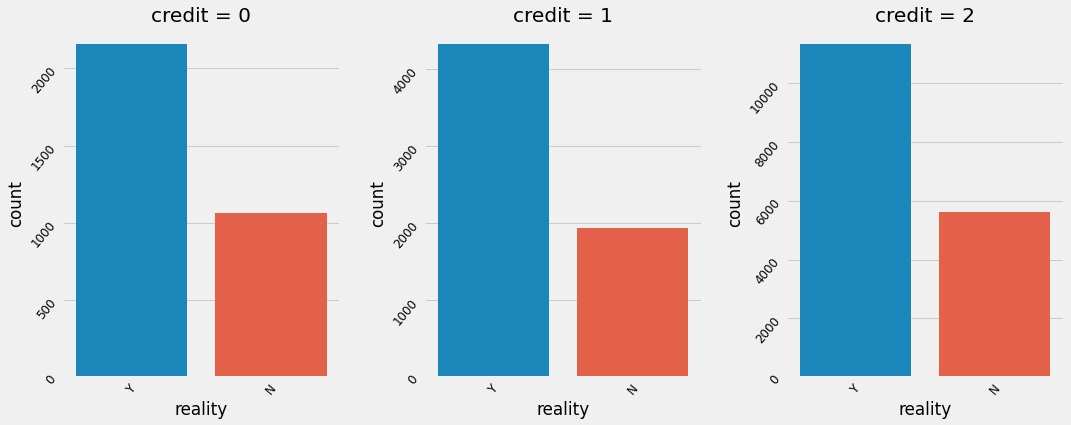

In [15]:
cat_plot('reality')

신용 등급에 따른 소득 분류의 구분

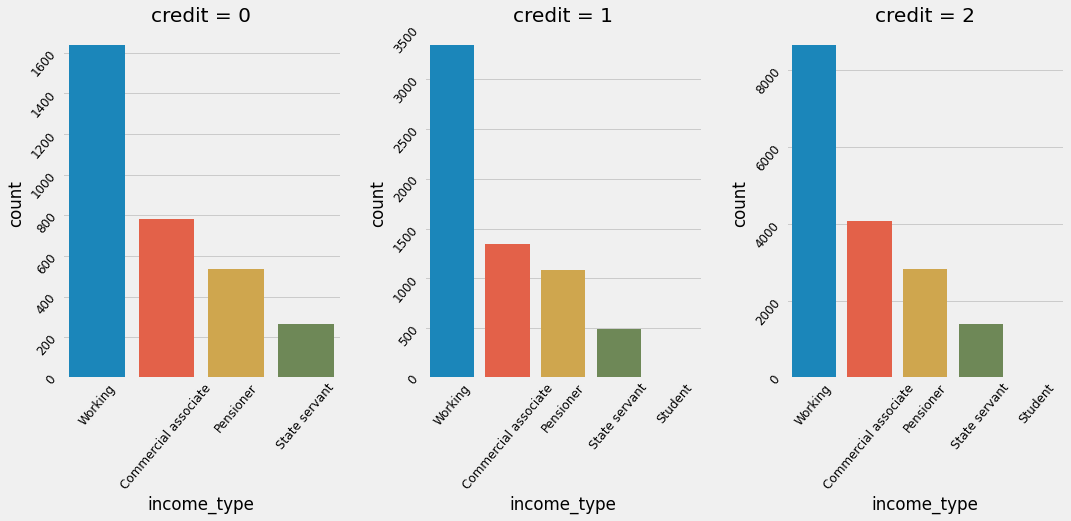

In [16]:
cat_plot('income_type') 

신용 등급에 따른 교육 수준의 분류 차이

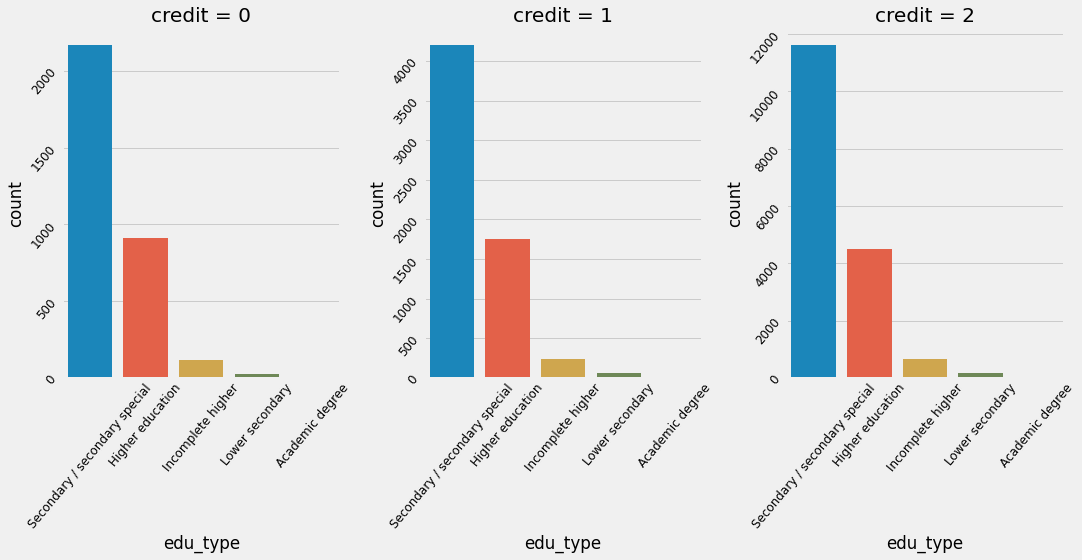

In [17]:
cat_plot('edu_type')

신용 등급에 따른 가족관계의 차이

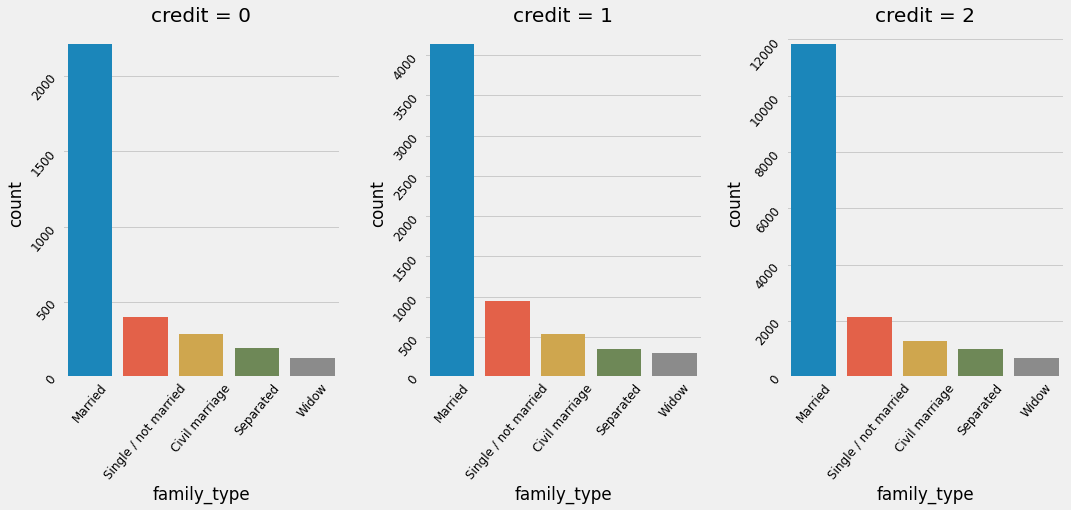

In [18]:
cat_plot('family_type')

신용 등급에 따른 부동산 생활 방식의 차이

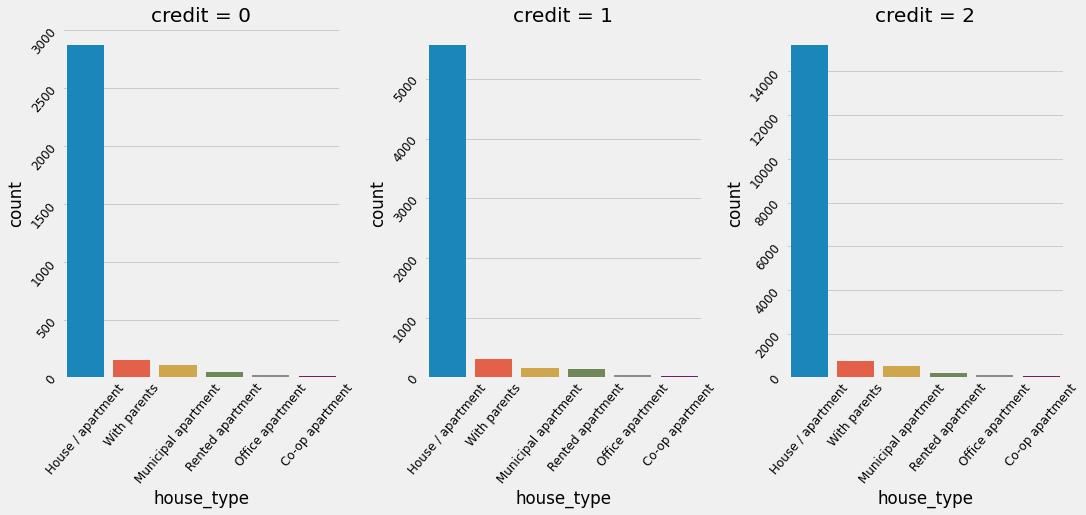

In [19]:
cat_plot('house_type')

신용 등급에 따른 핸드폰 소유 여부

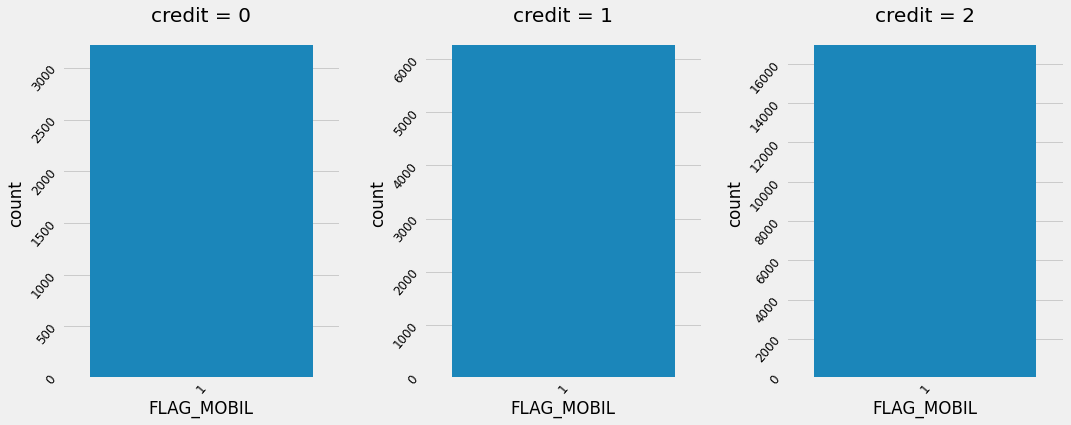

In [20]:
cat_plot('FLAG_MOBIL')

신용 등급에 따른 가정용 전화 소유 여부

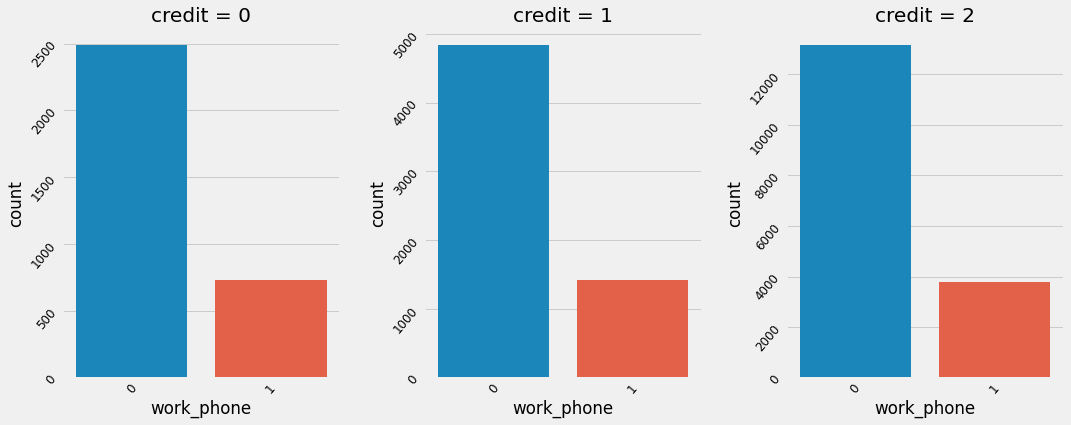

In [21]:
cat_plot('work_phone')

신용 등급에 따른 이메일 주소 사용의 여부

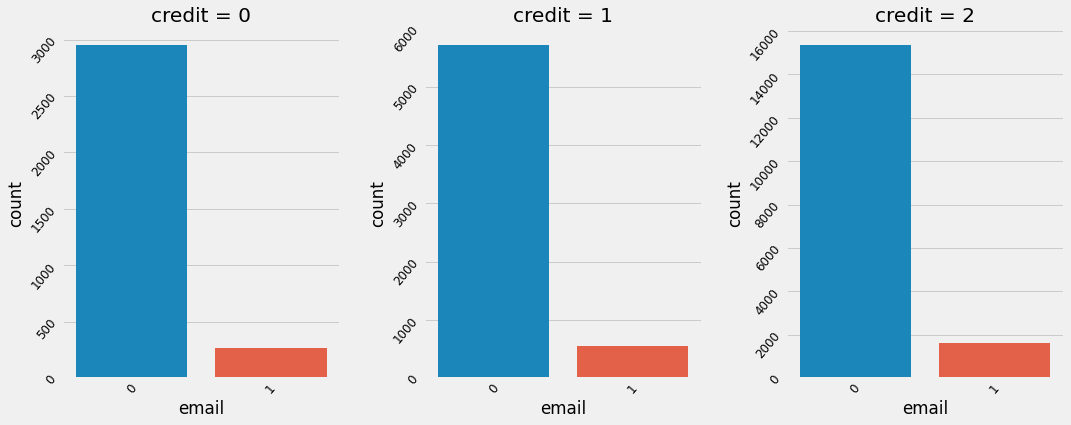

In [22]:
cat_plot('email')

직업 유형 차이를 확인하기 위해 결측치를 "No job"으로 바꾸고 그래프로 나타내 보자.

In [23]:
train_0 = train_0.fillna({'occyp_type':'No job'})
train_1 = train_1.fillna({'occyp_type':'No job'})
train_2 = train_2.fillna({'occyp_type':'No job'})

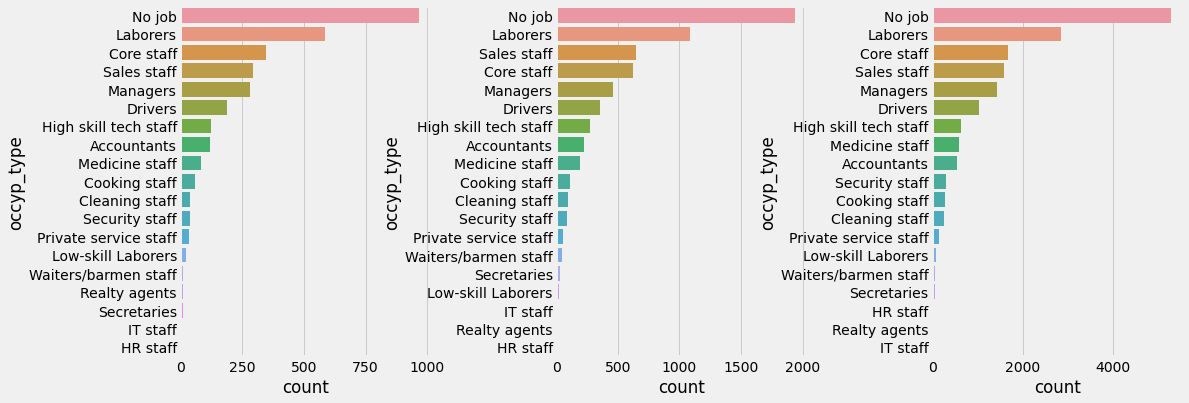

In [24]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

## (b) Numerical Variable EDA

In [25]:
# Numerical 그래프 함수 정의
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

신용 등급에 따른 자녀수의 차이

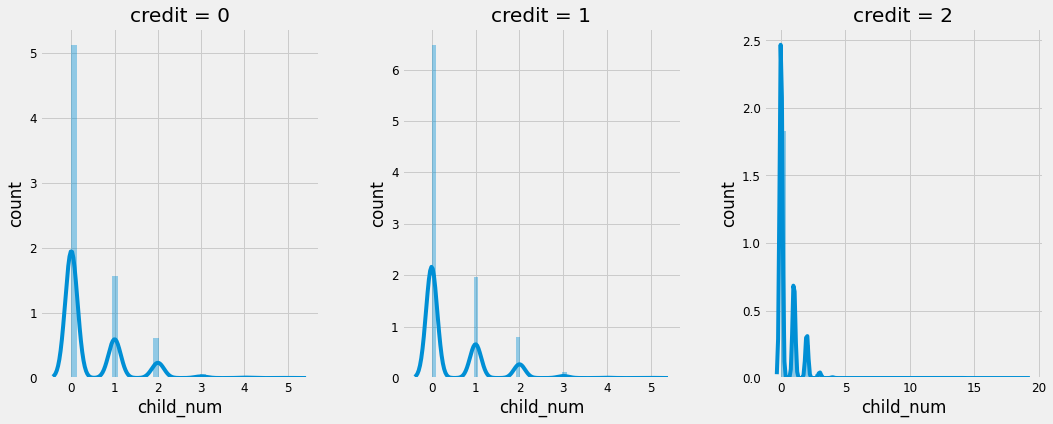

In [26]:
num_plot("child_num")

신용 등급에 따른 연간 소득 차이

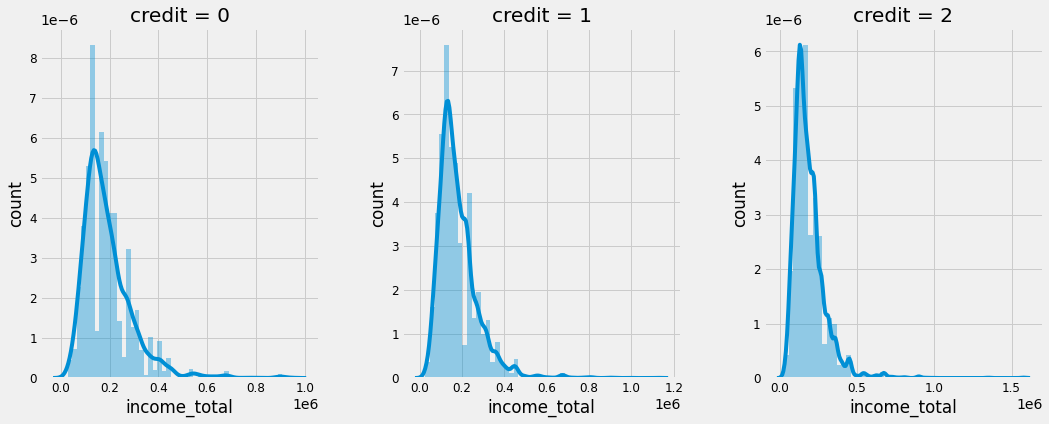

In [27]:
num_plot("income_total")

## Data Preprocessing
"DAYS_BIRTH" 출생일 변수로 연령대를 파악할 수 있는 "Age" 파생변수를 새로 만들어서 신용 등급에 따른 나이 차이를 확인해 볼 수 있다.  

In [28]:
#  Age 변수를 도출
train_0['Age'] = abs(train_0['DAYS_BIRTH'])/360
train_1['Age'] = abs(train_1['DAYS_BIRTH'])/360
train_2['Age'] = abs(train_2['DAYS_BIRTH'])/360
train_0['Age'].head()

3     41.911111
7     41.377778
12    33.161111
15    35.719444
22    42.216667
Name: Age, dtype: float64

In [29]:
train_0 = train_0.astype({'Age': 'int'})
train_1 = train_1.astype({'Age': 'int'})
train_2 = train_2.astype({'Age': 'int'})
train_0['Age'].head()

3     41
7     41
12    33
15    35
22    42
Name: Age, dtype: int64

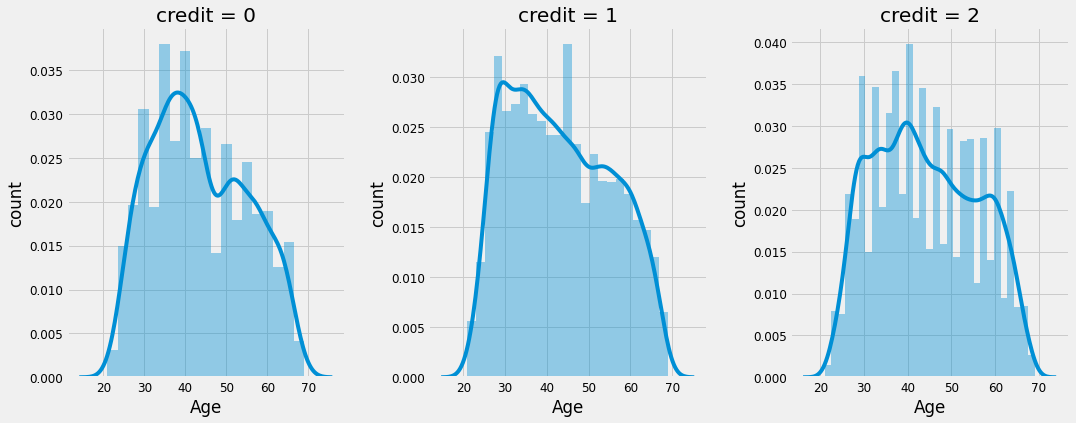

In [30]:
num_plot("Age")

신용 등급에 따른 가족 단위의 차이

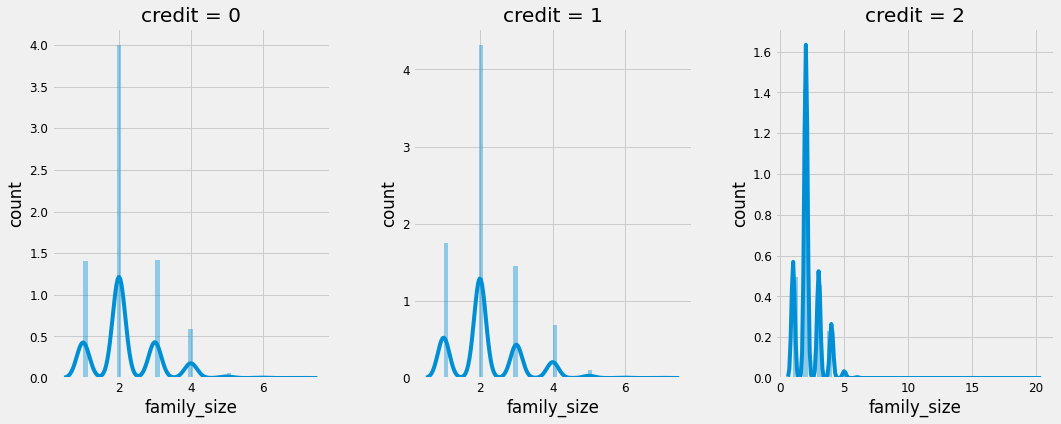

In [31]:
num_plot("family_size")

신용 등급에 다른 카드 발급 기간 차이
"begin_month" 변수를 통해 카드 발급 기간 "Month" 파생변수를 새로 만들어서 확인해 볼 수 있다.

In [32]:
train_0['Month'] = abs(train_0['begin_month'])
train_1['Month'] = abs(train_1['begin_month'])
train_2['Month'] = abs(train_2['begin_month'])
train_0 = train_0.astype({'Month': 'int'})
train_1 = train_1.astype({'Month': 'int'})
train_2 = train_2.astype({'Month': 'int'})
train_0['Month'].head()

3     37
7     53
12    60
15    60
22    22
Name: Month, dtype: int64

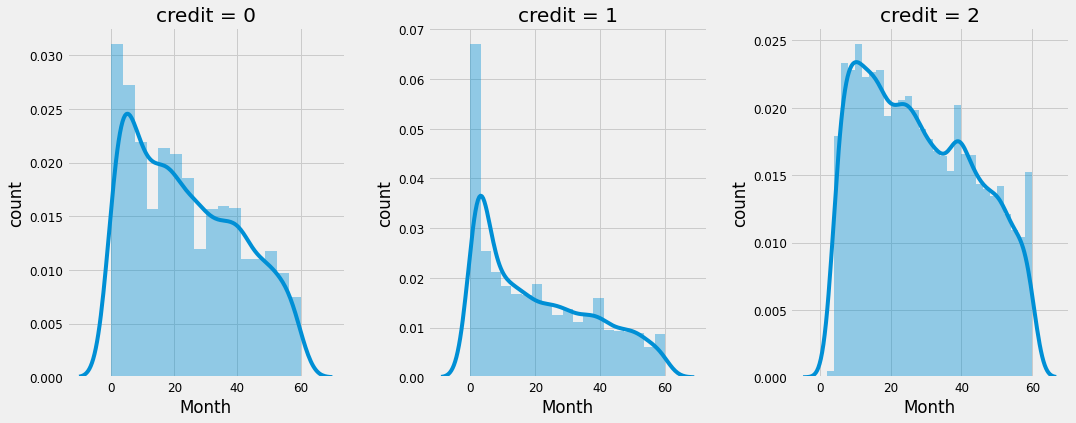

In [33]:
num_plot("Month")

# 2. Preprocessing


In [34]:
!pip install pycaret

     |████████████████████████████████| 264 kB 6.8 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 14.6 MB 82 kB/s 
     |████████████████████████████████| 248 kB 53.3 MB/s 
     |████████████████████████████████| 1.7 MB 24.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 41.6 MB/s 
     |████████████████████████████████| 167 kB 59.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 271 kB 31.4 MB/s 
     |████████████████████████████████| 111 kB 54.0 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 6.8 MB 10.7 MB/s 
     |████████████████████████████████| 10.1 MB 39.0 MB/s 
     |████████████████████████████████| 102 kB 70.4 MB/s 
     |██████████████████

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.metrics import log_loss
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PATH = '/content/drive/MyDrive/aiffel/DACON_credit_card_data/'

In [4]:
train = pd.read_csv(PATH+'/train.csv')
train = train.drop(['index'], axis=1)
train.fillna('NAN', inplace=True) 


test = pd.read_csv(PATH+'/test.csv')
test = test.drop(['index'], axis=1)
test.fillna('NAN', inplace=True)

submit = pd.read_csv(PATH+'/sample_submission.csv')

## Pycaret
Pycarrot allows you to leverage state of the art ml pipeline to build your machine learning models. You can build a series of ML models using a single function call and automatically rank different models against each other.

In [5]:
from pycaret.classification import *
from sklearn.metrics import log_loss

clf = setup(train, target = 'credit', train_size = 0.85)

,Description,Value
0,session_id,560
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26457, 19)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
#logloss 적용 및 predict_proba로 제출하기 위해 metric 추가
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f3c9cf9a950>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [7]:
#svm, ridge는 predict_proba 미지원으로 제외
best5 = compare_models(fold = 5, sort = 'logloss', n_select = 5, exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6976,0.7122,0.4288,0.6971,0.6223,0.2416,0.3233,0.7626,0.888
gbc,Gradient Boosting Classifier,0.6914,0.6569,0.4108,0.6801,0.6059,0.2120,0.3045,0.7962,9.906
lda,Linear Discriminant Analysis,0.6412,0.6095,0.3387,0.5338,0.5094,0.0156,0.0554,0.8644,0.264
nb,Naive Bayes,0.6409,0.6082,0.3351,0.5810,0.5021,0.0056,0.0424,0.8669,0.080
lr,Logistic Regression,0.6396,0.5414,0.3333,0.4091,0.4990,0.0000,0.0000,0.8836,1.208
rf,Random Forest Classifier,0.7002,0.7495,0.5435,0.6795,0.6844,0.3757,0.3816,1.0083,3.216
ada,Ada Boost Classifier,0.6893,0.6249,0.4048,0.6692,0.5997,0.1991,0.2997,1.0806,1.042
et,Extra Trees Classifier,0.6730,0.7104,0.5235,0.6527,0.6587,0.3237,0.3280,2.6067,3.206
knn,K Neighbors Classifier,0.6165,0.6607,0.4654,0.5953,0.6031,0.2166,0.2188,4.0322,0.778
dt,Decision Tree Classifier,0.6065,0.6402,0.4968,0.6173,0.6114,0.2598,0.2602,13.1288,0.280


In [8]:
blended = blend_models(estimator_list = best5, fold = 5, optimize = 'logloss')
pred_holdout = predict_model(blended)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6919,0.6814,0.4069,0.6251,0.6024,0.2048,0.3102,0.8133
1,0.6912,0.6675,0.4060,0.6242,0.6013,0.2025,0.3080,0.8163
2,0.6854,0.6545,0.3977,0.6153,0.5916,0.1829,0.2879,0.8199
3,0.6871,0.6691,0.4005,0.6224,0.5949,0.1874,0.2942,0.8185
4,0.6954,0.6776,0.4120,0.6253,0.6081,0.2183,0.3210,0.8124
Mean,0.6902,0.6700,0.4046,0.6225,0.5997,0.1992,0.3043,0.8161
SD,0.0035,0.0093,0.0050,0.0037,0.0058,0.0127,0.0118,0.0029


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.6994,0,0.4051,0.6268,0.6105,0.2011,0.3052,0


In [9]:
#lda 와 nb는 losloss가 좋지만 accuracy, auc가 상대적으로 좋지 않아 커스텀모델 생성
custom_model = compare_models(fold = 5, sort = 'logloss', n_select = 6, include=['lightgbm','gbc','rf','ada', 'lda', 'nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6976,0.7122,0.4288,0.6971,0.6223,0.2416,0.3233,0.7626,1.390
gbc,Gradient Boosting Classifier,0.6914,0.6569,0.4108,0.6801,0.6059,0.2120,0.3045,0.7962,9.916
lda,Linear Discriminant Analysis,0.6412,0.6095,0.3387,0.5338,0.5094,0.0156,0.0554,0.8644,0.264
nb,Naive Bayes,0.6409,0.6082,0.3351,0.5810,0.5021,0.0056,0.0424,0.8669,0.082
rf,Random Forest Classifier,0.7002,0.7495,0.5435,0.6795,0.6844,0.3757,0.3816,1.0083,3.250
ada,Ada Boost Classifier,0.6893,0.6249,0.4048,0.6692,0.5997,0.1991,0.2997,1.0806,0.986


In [10]:
blended_custom = blend_models(estimator_list = custom_model, fold = 5, optimize = 'logloss')
pred_holdout_custom = predict_model(blended_custom)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6972,0.7431,0.4169,0.7485,0.6131,0.2268,0.3254,0.7839
1,0.6972,0.7364,0.4184,0.7137,0.6140,0.2269,0.3261,0.7853
2,0.6894,0.7305,0.4062,0.7068,0.6008,0.2013,0.2995,0.7903
3,0.6916,0.7415,0.4104,0.7413,0.6054,0.2091,0.3059,0.7860
4,0.7009,0.7467,0.4232,0.7138,0.6196,0.2418,0.3366,0.7813
Mean,0.6953,0.7397,0.4150,0.7248,0.6106,0.2212,0.3187,0.7854
SD,0.0042,0.0056,0.0060,0.0167,0.0067,0.0144,0.0138,0.0030


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,Voting Classifier,0.7047,0.7476,0.4148,0.6698,0.6208,0.2242,0.3216,0.7718


# 3. Prediction

In [11]:
#자동으로 상위 5개 선택한 모델
final_model = finalize_model(blended)

#Accurary, AUC, Logloss 셋다 상위 4개인 모델 
final_model_custom = finalize_model(blended_custom)

In [12]:
#Accurary, AUC, Logloss 셋다 상위 4개인 모델 사용
prep_pipe = get_config("prep_pipe")
prep_pipe.steps.append(['trained_model', final_model_custom])
prections = prep_pipe.predict_proba(test)
prections

array([[0.12004662, 0.19040381, 0.68954956],
       [0.22930708, 0.19780598, 0.57288694],
       [0.12691927, 0.17397186, 0.69910887],
       ...,
       [0.10526223, 0.14336726, 0.75137051],
       [0.22863808, 0.21458196, 0.55677996],
       [0.15297689, 0.27586524, 0.57115787]])

Create submission file

In [13]:
i, j, k = [], [], []
for row in prections:
  i.append(row[0])
  j.append(row[1])
  k.append(row[2])

len(i), len(j), len(k)

(10000, 10000, 10000)

In [14]:
submit['0'] = i
submit['1'] = j
submit['2'] = k
submit.head(10)

,index,0,1,2
0,26457,0.120047,0.190404,0.689550
1,26458,0.229307,0.197806,0.572887
2,26459,0.126919,0.173972,0.699109
3,26460,0.123533,0.164794,0.711673
4,26461,0.150105,0.252401,0.597494
5,26462,0.148175,0.251232,0.600593
6,26463,0.309385,0.422075,0.268539
7,26464,0.147128,0.233275,0.619597
8,26465,0.131115,0.212125,0.656760
9,26466,0.126744,0.248889,0.624368


In [15]:
submit.to_csv(PATH+"\submisison.csv",index=False)

# Result

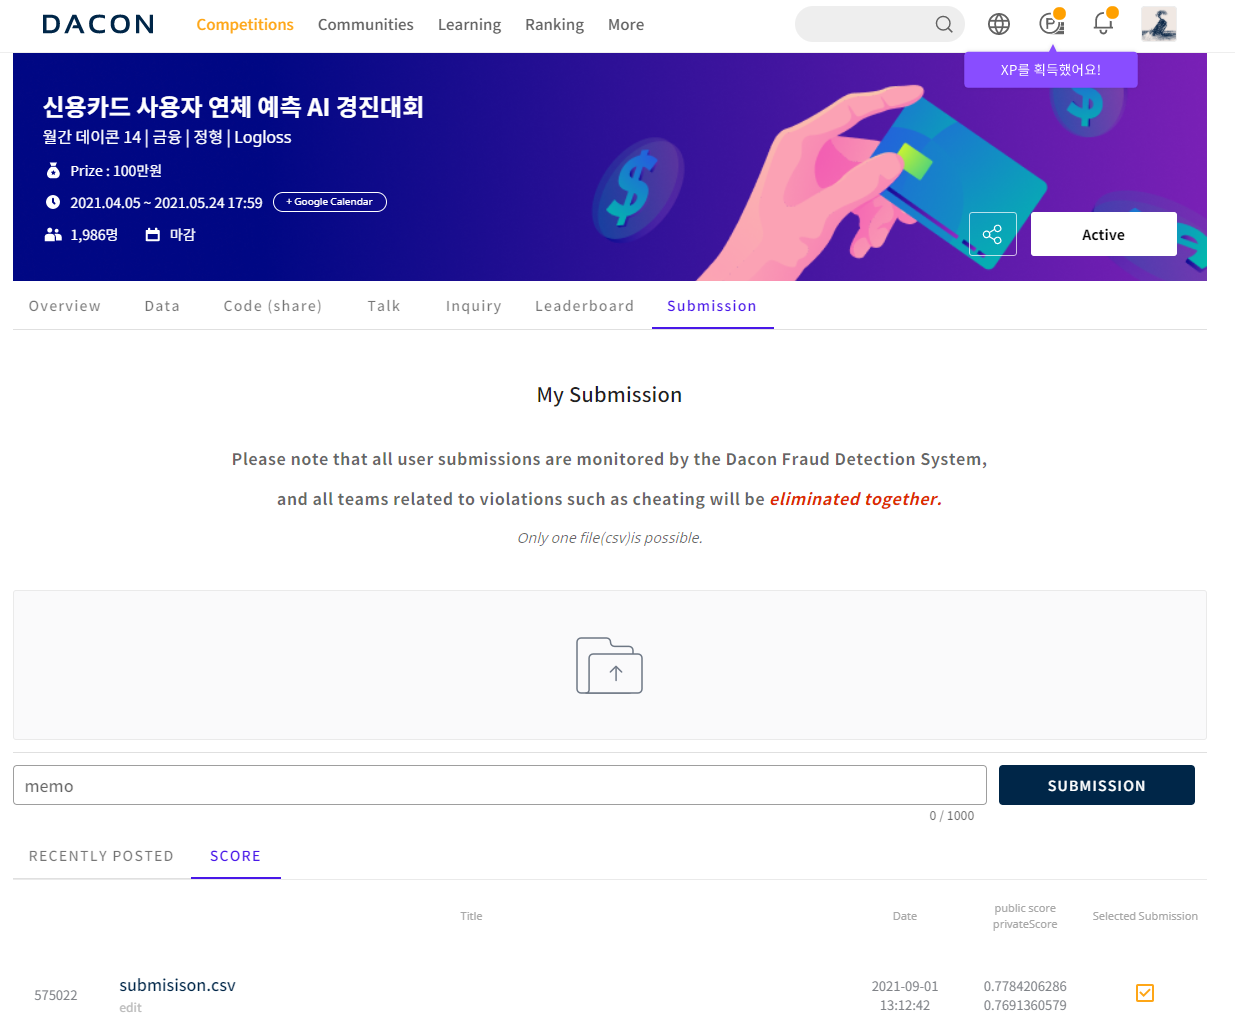

# Reference

Kernel:
- https://dacon.io/en/competitions/official/235713/codeshare/2519?page=1&dtype=view
- Basline: https://dacon.io/en/competitions/official/235713/codeshare/2477?page=1&dtype=recent&ptype=undefined

PyCaret: 
- https://www.youtube.com/watch?v=sL-4rWuEiVw&ab_channel=NicholasRenotte